# Introduction

<h5>Task: Regression Task<br>
<h5>Metrics:- 

1.   Root Mean square error
2.   Mean absolute percentage error


Predict the GT_turbine_decay_coefficient 



# Step to Follow <br>


1.   Clean the data
2.   Remove unwanted data/Feature
3.   Remove most correlated Feature
4.   Train Model 
5. Summary



# Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')


# Reading Data 

In [ ]:
## Reading dataset
df = pd.read_csv("/content/drive/My Drive/propulsion.csv")
df = df.drop([df.columns[0]],axis = 1)
df.columns = ['lever_pos', 'ship_spd', 'Gasturbine_torq', 'Gasturbine_rev',
       'Gasgen_rev', 'starboard_torq', 'propeller_torq', 'hpturb_temp','GTcomp_intemp',
       'GTcomp_outtemp', 'HPturb_press','GTcomp_inpress', 'GTcomp_outpress', 'Gastrub_press',
       'turb_inject', 'Fuelflow', 'GTcomp_decay', 'GTturb_comp']
print(df.shape)
df.head()

(10000, 18)


,lever_pos,ship_spd,Gasturbine_torq,Gasturbine_rev,Gasgen_rev,starboard_torq,propeller_torq,hpturb_temp,GTcomp_intemp,GTcomp_outtemp,HPturb_press,GTcomp_inpress,GTcomp_outpress,Gastrub_press,turb_inject,Fuelflow,GTcomp_decay,GTturb_comp
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


# Checking Missing Value

In [ ]:
### CHECKING MISSING VALUE
check_missing_value = df.isnull().sum() != 0
if check_missing_value.all():
  print("Dataset has some missing value")
else:
  print("Dataset does not contain any missing value")

Dataset does not contain any missing value


# Remove unwanted Columns

In [ ]:
print(df['GTcomp_intemp'].unique())
print(df['GTcomp_inpress'].unique())
print("BOTH THE FEATURES HAS SAME VALUES AND it NOT  CHANGE ANYTHING")
df = df.drop(['GTcomp_intemp','GTcomp_inpress'],axis=1)


[288.]
[0.998]
BOTH THE FEATURES HAS SAME VALUES AND it NOT  CHANGE ANYTHING


# Correlation 

(14, 14)


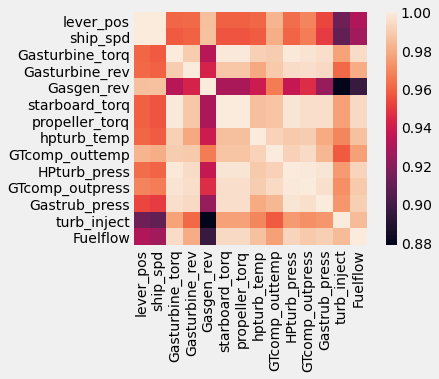

In [ ]:
data = df.drop(df.columns[-2:],axis = 1)
corr  = data.corr()
print(corr.shape)
sns.heatmap(corr, vmax=1.0, square=True)

Remove the highly correlated features


(11, 11)


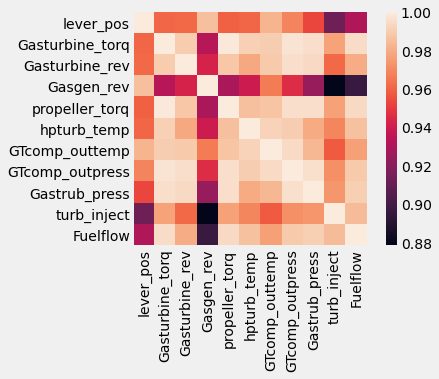

In [ ]:
data = data.drop(['ship_spd','starboard_torq', 'HPturb_press'],axis = 1)
corr  = data.corr()
print(corr.shape)
sns.heatmap(corr, vmax=1.0, square=True)

# Remove highly correlated Feature

In [ ]:
## CREATING DIFFERENT DATASET FROM THE DATAFRAME FOR TRAINING THE MODEL
GT_TURBINE_Y = df['GTturb_comp']
DATA_X = df[data.columns]
print("GT_TURBINE_Y shape = ", GT_TURBINE_Y.shape)
print("DATA shape = ",DATA_X.shape)

GT_TURBINE_Y shape =  (10000,)
DATA shape =  (10000, 11)


# Metrics

In [ ]:
def mape(y_pred, y_true):
  """ Mean Absolute Percentage Error """
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def rmse(y_pred, y_true):
  """ Root Mean Squared Error """
  return np.sqrt(((y_pred - y_true) ** 2).mean())

# Split Train Test data

In [ ]:
## SPLITING THE DATA IN TRAIN AND TEST FOR VALIDATION OF OUR MODEL
X_train, X_test, y_train, y_test = train_test_split(DATA_X, GT_TURBINE_Y, test_size=0.20, random_state=42)
print("X_train shape = ",X_train.shape)
print("Y_train shape = ",y_train.shape)
print("X_test shape = ",X_test.shape)
print("Y_test shape = ",y_test.shape)

X_train shape =  (8000, 11)
Y_train shape =  (8000,)
X_test shape =  (2000, 11)
Y_test shape =  (2000,)


# Training Model

## LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
train_predY = reg.predict(X_train)
test_predY = reg.predict(X_test)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEDIAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  0.0023030871823368003
TEST ROOT MEAN SQUARED ERROR=  0.0023053961020329024
TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR =  0.1726634759353349
TEST MEDIAN ABSOLUTE PERCENTAGE ERROR=  0.17586599028108413


## Ridge Regression 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Hyperparameter Tuning
params  ={"alpha":[0.001,0.01,0.05,0.5,0.1,1,0.00001,0.003,0.005,0.00005]}
reg = Ridge()
GridCV = GridSearchCV(reg,params,cv= 3)
GridCV.fit(X_train,y_train)
print(GridCV.best_params_)

{'alpha': 1e-05}


In [ ]:
# Trainig Model
reg = Ridge(alpha = 1e-05)
reg.fit(X_train,y_train)
train_predY = reg.predict(X_train)
test_predY = reg.predict(X_test)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEDIAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  0.002303097844713823
TEST ROOT MEAN SQUARED ERROR=  0.0023052113669390934
TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR =  0.17263437732798417
TEST MEDIAN ABSOLUTE PERCENTAGE ERROR=  0.17579703516725118


## Lasso Regression

In [ ]:
# Hyperparameter Tuning
params  ={"alpha":[0.001,0.01,0.05,0.5,0.1,1,0.00001,0.003,0.005,0.00005]}
reg = Lasso()
GridCV = GridSearchCV(reg,params,cv= 3)
GridCV.fit(X_train,y_train)
print(GridCV.best_params_)

{'alpha': 5e-05}


In [ ]:
# Training Model
reg = Lasso(alpha = 5e-05)
reg.fit(X_train,y_train)
train_predY = reg.predict(X_train)
test_predY = reg.predict(X_test)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEDIAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  0.006025080433148156
TEST ROOT MEAN SQUARED ERROR=  0.006030383169368877
TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR =  0.5204553021369809
TEST MEDIAN ABSOLUTE PERCENTAGE ERROR=  0.5216884971378964


## RandomForest Model


In [ ]:
## Hyperparameter Tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 200, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

In [ ]:
print(rf_random.best_params_)

{'n_estimators': 432, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 169, 'bootstrap': True}


In [ ]:
# Training Model
rf = RandomForestRegressor(n_estimators = 432, min_samples_split= 6, min_samples_leaf=2, max_features='auto', max_depth= 169, bootstrap=True)
rf.fit(X_train,y_train)
train_predY = rf.predict(X_train)
test_predY = rf.predict(X_test)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  0.00042318177914886745
TEST ROOT MEAN SQUARED ERROR=  0.0008265372359557396
TRAIN MEAN ABSOLUTE PERCENTAGE ERROR =  0.020589199961288492
TEST MEAN ABSOLUTE PERCENTAGE ERROR=  0.04120660821786482


## Gradient Boosting Decision Tree

In [ ]:

gridParams = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005,0.001,0.02,0.5],
    'n_estimators': [int(x) for x in np.linspace(start = 50,stop = 1000,num = 12)],
    'num_leaves': [int(x) for x in np.linspace(start = 20, stop = 600, num = 10)],
    'boosting_type' : ['gbdt', 'dart','goss'],
    'objective' : ['regression'],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7,0.9,0.2,0.1],
    'subsample' : [0.5,0.7,0.6,0.9,0.2,0.01],
    'min_split_gain' : [0.01,0.5,0.001,0.0,0.1,0.0001],
    'min_child_weight' : [0.001,0.00001,0.1,0.0001,0.002,0.005,0.0005],
    'min_child_samples': [20,5,6,7,8,9,10,12,25,15,18],
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'reg_alpha':[0,0.1,0.002,0.005,0.0001,0.0005,0.00006]
    }
reg  = lgb.LGBMRegressor(eval_metric = 'rmse')
randomSearchCV = RandomizedSearchCV(reg,gridParams,n_iter = 1000,n_jobs=-1,cv=3)
randomSearchCV.fit(X_train,y_train)
print(randomSearchCV.best_params_)


{'subsample': 0.2, 'reg_alpha': 0.002, 'random_state': 501, 'objective': 'regression', 'num_leaves': 148, 'n_estimators': 654, 'min_split_gain': 0.0, 'min_data_in_leaf': 60, 'min_child_weight': 0.0005, 'min_child_samples': 15, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}


In [ ]:
import lightgbm as lgb
reg  = lgb.LGBMRegressor(subsample = 0.2,reg_alpha =  0.002 ,random_state= 501, objective= 'regression', num_leaves= 148 , n_estimators = 654 ,min_split_gain=0.0, min_data_in_leaf=60,min_child_weight=0.005,min_child_samples= 15,max_depth= -1, learning_rate= 0.1, colsample_bytree= 0.7, boosting_type= 'gbdt',eval_metrics = 'rmse')
reg.fit(X_train,y_train)
train_predY = reg.predict(X_train)
test_predY = reg.predict(X_test)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEDIAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  0.00038608293270145626
TEST ROOT MEAN SQUARED ERROR=  0.000699549341509573
TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR =  0.02682083078074042
TEST MEDIAN ABSOLUTE PERCENTAGE ERROR=  0.04348179160230408


# Feature Importance

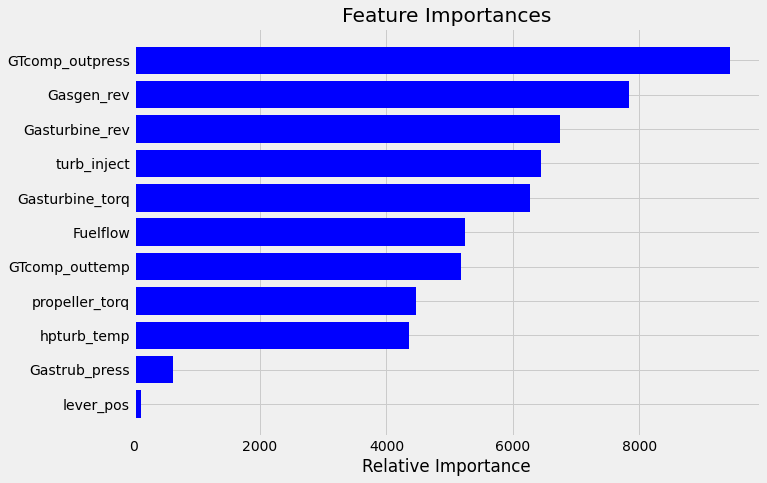

In [ ]:
## Plot the Features Importance 
features = X_train.columns
importances = reg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# DEEP LEARNING


## Import Library

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import  tensorflow.keras.backend as K
## Defining Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.001, patience=5, verbose=1, mode='auto')

## Metrics

In [ ]:
def mape(y_true,y_pred):
  """ Mean Absolute Percentage Error"""
  return K.mean(K.abs((y_true - y_pred) / y_true)) * 100
def rmse( y_true,y_pred):
  """ Root Mean Squared Error """
  return K.mean(K.sqrt((( y_true - y_pred ) ** 2)))

## Define Model Architecture

### Intialize Normalize Layer

In [ ]:
## Normalize Layer
norm = preprocessing.Normalization(input_shape=[11,])

norm.adapt(np.array(X_train))
## Define weight Intializer for Relu activation 
initializer = tf.keras.initializers.HeUniform()

### Architecture

In [ ]:
## Define the Architecture
model = tf.keras.Sequential()
model.add(norm)
model.add(layers.Dense(512,kernel_initializer=initializer,activation = 'relu'))
model.add(layers.Dense(32,kernel_initializer=initializer,activation = 'relu'))
model.add(layers.Dense(256,kernel_initializer=initializer,activation = 'relu'))


model.add(layers.Dense(128,kernel_initializer=initializer,activation = 'relu'))
model.add(layers.Dense(64,kernel_initializer=initializer,activation = 'relu'))
model.add(layers.Dense(32,kernel_initializer=initializer,activation = 'relu'))
model.add(layers.Dense(32,kernel_initializer=initializer,activation = 'relu'))


model.add(layers.Dense(12,kernel_initializer=initializer,activation='relu'))
model.add(layers.Dense(1,kernel_initializer='normal'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_82 (Dense)             (None, 512)               6144      
_________________________________________________________________
dense_83 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_84 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_85 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_86 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_87 (Dense)             (None, 32)              

## Training 

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')
histroy = model.fit(X_train,y_train,batch_size = 128,epochs=20,validation_data=(X_test,y_test),callbacks=lr_scheduler)

Epoch 1/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0667 - val_loss: 1.9183e-04
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.4807e-04 - val_loss: 6.4937e-05
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 5.6916e-05 - val_loss: 5.1609e-05
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 4.6238e-05 - val_loss: 4.6342e-05
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 3.8631e-05 - val_loss: 3.9996e-05
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 3.2612e-05 - val_loss: 3.0917e-05
Epoch 7/20
58/63 [==========================>...] - ETA: 0s - loss: 2.7856e-05
Epoch 00007: ReduceLROnPlateau reducing learning rate to 9.999999776482582e-06.
63/63 [==============================] - 0s 5ms/step - loss: 2.7914e-05 - val_loss: 2.5025e-05
Epoch 8/20
63/63 [==============================] - 0s 5ms/step - loss: 2.4298e-05 - val_loss: 2.4929e-05
Epoch 9/

### Performace of Model

In [ ]:
train_predY = model.predict(X_train)
test_predY = model.predict(X_test)
y_train  = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(train_predY,y_train))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(test_predY,y_test))
print("TRAIN MEAN ABSOLUTE PERCENTAGE ERROR = ",mape(train_predY,y_train))
print("TEST MEAN ABSOLUTE PERCENTAGE ERROR= ",mape(test_predY,y_test))

TRAIN ROOT MEAN SQUARED ERROR =  0.004907452732605113
TEST ROOT MEAN SQUARED ERROR=  0.004975823380864176
TRAIN MEAN ABSOLUTE PERCENTAGE ERROR =  0.3417458441770428
TEST MEAN ABSOLUTE PERCENTAGE ERROR=  0.3480676754047298


# Summary

In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Train_rmse", "Test_rmse", "Train_mape","Test_mape"]

x.add_row(["Linear Regression", 0.002,0.002,0.17,0.17])
x.add_row(["Ridge Regression",0.002,0.002,0.17,0.17])
x.add_row(["Lasso Regression", 0.006,0.006,0.52,0.52])
x.add_row(["RandomForest Regression",0.0004,0.0008,0.02,0.04])
x.add_row(["GBDT Regression",0.0003,0.0006,0.02,0.04])
x.add_row(["Deep Learning Model", 0.004,0.004,0.321,0.348])
print(x)

+-------------------------+------------+-----------+------------+-----------+
|          Model          | Train_rmse | Test_rmse | Train_mape | Test_mape |
+-------------------------+------------+-----------+------------+-----------+
|    Linear Regression    |   0.002    |   0.002   |    0.17    |    0.17   |
|     Ridge Regression    |   0.002    |   0.002   |    0.17    |    0.17   |
|     Lasso Regression    |   0.006    |   0.006   |    0.52    |    0.52   |
| RandomForest Regression |   0.0004   |   0.0008  |    0.02    |    0.04   |
|     GBDT Regression     |   0.0003   |   0.0006  |    0.02    |    0.04   |
|   Deep Learning Model   |   0.004    |   0.004   |   0.321    |   0.348   |
+-------------------------+------------+-----------+------------+-----------+


Clearly, Grandient Boosting Decision Tree  perform best.

*Sorry For Spelling Mistake if you found any*